In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('C:\\Users\\Shyam\\Downloads\\brainandbody.csv',sep=',')


In [2]:
import pandas as pd
import datetime
import pandas.io as data, web
import pandas.io.data as web
import matplotlib.pyplot as plt
from matplotlib import style

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2015, 8, 22)
df = web.DataReader("XOM", "yahoo", start, end)
print(df.head())


style.use('fivethirtyeight')

df['High'].plot()
plt.legend()
plt.show()

ImportError: No module named 'web'

In [8]:
web_stats = {'Day':[1,2,3,4,5,6],
             'Visitors':[43,34,65,56,29,76],
             'Bounce Rate':[65,67,78,65,45,52]}

df = pd.DataFrame(web_stats)
df.set_index("Day", inplace=True)
df[df['Visitors']>50]



,Bounce Rate,Visitors
Day,,
3,78,65
4,65,56
6,52,76


In [11]:
import quandl
import html5lib
import lxml
from bs4 import BeautifulSoup
mydata = quandl.get("ZILL/N00996_4B", authtoken="11GstZ6fzE366WL6SZ6_")
states_mydata_AK = quandl.get("FMAC/HPI_AK", authtoken="11GstZ6fzE366WL6SZ6_")
states_mydata_NC= quandl.get("FMAC/HPI_AK", authtoken="11GstZ6fzE366WL6SZ6_")

states_mydata_NC

#fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
#fiddy_states

,Value
Date,
1975-01-31,34.447924
1975-02-28,34.958144
1975-03-31,35.480144
1975-04-30,36.024334
1975-05-31,36.617578
1975-06-30,37.251232
1975-07-31,37.883966
1975-08-31,38.459793
1975-09-30,38.960996


In [14]:
import quandl
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')


def state_list():
    fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    print(fiddy_states[0][0][1:])
    return fiddy_states[0][0][1:]
    

def grab_initial_state_data():
    states = state_list()

    main_df = pd.DataFrame()

    for abbv in states:
        query = "FMAC/HPI_"+str(abbv)
        df = quandl.get(query, authtoken="11GstZ6fzE366WL6SZ6_")
        print(df)
        #df[abbv] = (df[abbv]-df[abbv][0]) / df[abbv][0] * 100.0
        print(df.head())
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df)
            
    pickle_out = open('fiddy_states3','wb')
    pickle.dump(main_df, pickle_out)
    pickle_out.close()

def HPI_Benchmark():
    df = quandl.get("FMAC/HPI_USA", authtoken=api_key)
    df["United States"] = (df["United States"]-df["United States"][0]) / df["United States"][0] * 100.0
    return df

grab_initial_state_data()

# fig = plt.figure()
# ax1 = plt.subplot2grid((1,1), (0,0))

# HPI_data = pd.read_pickle('fiddy_states3')
# HPI_State_Correlation = HPI_data.corr()

1     AL
2     AK
3     AZ
4     AR
5     CA
6     CO
7     CT
8     DE
9     FL
10    GA
11    HI
12    ID
13    IL
14    IN
15    IA
16    KS
17    KY
18    LA
19    ME
20    MD
21    MA
22    MI
23    MN
24    MS
25    MO
26    MT
27    NE
28    NV
29    NH
30    NJ
31    NM
32    NY
33    NC
34    ND
35    OH
36    OK
37    OR
38    PA
39    RI
40    SC
41    SD
42    TN
43    TX
44    UT
45    VT
46    VA
47    WA
48    WV
49    WI
50    WY
Name: 0, dtype: object
                 Value
Date                  
1975-01-31   35.311045
1975-02-28   35.533128
1975-03-31   35.792522
1975-04-30   36.109691
1975-05-31   36.411170
1975-06-30   36.579569
1975-07-31   36.549579
1975-08-31   36.355201
1975-09-30   36.116257
1975-10-31   35.990729
1975-11-30   36.072233
1975-12-31   36.388245
1976-01-31   36.913648
1976-02-29   37.524537
1976-03-31   38.062616
1976-04-30   38.432978
1976-05-31   38.640694
1976-06-30   38.734440
1976-07-31   38.779124
1976-08-31   38.790885
1976-09-30   38.78182

ValueError: columns overlap but no suffix specified: Index(['Value'], dtype='object')

                 Value
Date                  
1975-12-31   33.936681
1976-12-31   36.398103
1977-12-31   40.044939
1978-12-31   45.962604
1979-12-31   53.347559
1980-12-31   60.013589
1981-12-31   64.513281
1982-12-31   69.578740
1983-12-31   72.194185
1984-12-31   75.054006
1985-12-31   76.048316
1986-12-31   75.416970
1987-12-31   71.399478
1988-12-31   67.693819
1989-12-31   67.343521
1990-12-31   67.746778
1991-12-31   69.181745
1992-12-31   71.339331
1993-12-31   73.800859
1994-12-31   76.180689
1995-12-31   77.869060
1996-12-31   80.052095
1997-12-31   82.173264
1998-12-31   86.288013
1999-12-31   91.677996
2000-12-31   97.841965
2001-12-31  103.034184
2002-12-31  106.753531
2003-12-31  109.545398
2004-12-31  112.806108
2005-12-31  117.915358
2006-12-31  124.828533
2007-12-31  130.086624
2008-12-31  129.804116
2009-12-31  128.208977
2010-12-31  127.913176
2011-12-31  125.840870
2012-12-31  130.537294
2013-12-31  140.526656
2014-12-31  152.082799
2015-12-31  164.022670
2016-12-31 

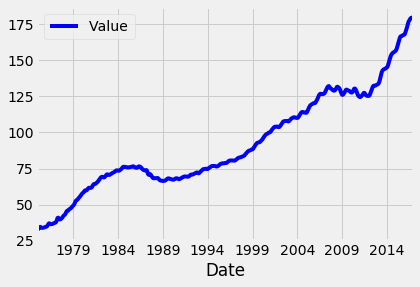

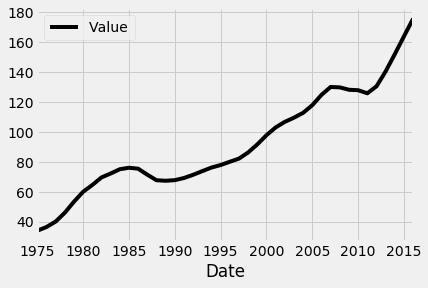

In [15]:
import matplotlib.pyplot as plt
query = "FMAC/HPI_TX"
TX1yr = quandl.get(query, authtoken="11GstZ6fzE366WL6SZ6_")
#print(TX1yr)
TX1yr_1 = TX1yr.resample('A').mean()
print(TX1yr_1)

TX1yr.plot(color='b')
TX1yr_1.plot(color='k')

plt.legend()
plt.show()

In [ ]:
#Missing data
HPI_data = pd.DataFrame()
TX1yr_1 = TX1yr.resample('M').mean()
#print(TX1yr_1)
HPI_data['TX1yr'] = TX1yr_1['Value']
HPI_data['TX1'] = TX1yr['Value']
print(HPI_data.dropna(inplace=True))
#print(HPI_data.fillna(method="bfill")) #bfill from backward, ffill from before


HPI_data['Rolling_avg'] = pd.rolling_mean(HPI_data['TX1yr'],12)
print(HPI_data)

In [ ]:
dates = pd.date_range('20130101', periods=6)
dates

In [ ]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df.T
df.loc['20130102':'20130104',['A','B']]
df.mean()

print(df)
df.apply(np.cumsum)

In [ ]:
np.random.randn(10, 4)

In [ ]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                        'B' : ['A', 'B', 'C'] * 4,
                        'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                        'D' : np.random.randn(12),
                        'E' : np.random.randn(12)})
print(df)
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

In [ ]:
pd.date_range('20121228', periods=100, freq='D')

In [7]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df["grade"] = df["raw_grade"].astype("category")
df["grade"] 

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]